In [1]:
import pandas
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

# 1. set up for datasets and k values

In [2]:
datasets = np.array(pandas.read_csv('iris.csv'))
print(datasets)

[[4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 1.6 0.2 'Iris-setosa']
 [5.4 3.4 

In [3]:
x = datasets[:,[0,1,2,3]]
y = datasets[:,4]

In [4]:
y_processed = []
for thing in y:
    if thing == 'Iris-setosa':
        y_processed.append(0)
    if thing == 'Iris-versicolor':
        y_processed.append(1)
    if thing == 'Iris-virginica':
        y_processed.append(2)
print(y_processed)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [5]:
trainX, testX, trainY, testY = train_test_split(x, y_processed, test_size=0.2)

In [6]:
#k could be 1-51
k = 3

# 2. train and predict

In [7]:
# distance calculation
from math import sqrt
def distance_Cal(k, testCase, trainX, trainY):
    distanceArr = []
    count = 0
    for point in trainX:
        distance0 = testCase[0] - point[0]
        distance1 = testCase[1] - point[1]
        distance2 = testCase[2] - point[2]
        distance3 = testCase[3] - point[3]
        distanceTotal = distance0*distance0 + distance1*distance1 + distance2*distance2 + distance2*distance2
        distanceTotal = sqrt(distanceTotal)
        #print("trainY[count]")
        #print(trainY[count])
        #print("distanceTotal")
        #print(distanceTotal)
        distanceArr.append([distanceTotal,trainY[count]])
        count = count+1
    distanceNP = np.array(distanceArr)
    distanceSort = distanceNP[np.argsort(distanceNP[:, 0])]
    #distanceSort = np.sort(distanceNP,axis = 0)
    #print(distanceSort)
    count0 = 0
    count1 = 0
    count2 = 0
    countk = 0
    while countk<k:
        temp = distanceSort[countk]
        if temp[1] == 0:
            count0 = count0+1
        if temp[1] == 1:
            count1 = count1+1
        if temp[1] == 2:
            count2 = count2+1
        countk = countk+1
    #print("-----")
    #print(count0)
    #print(count1)
    #print(count2)
    if count0>count1:
        if count0>count2:
            return 0
    if count1>count0:
        if count1>count2:
            return 1
    if count2>count1:
        if count2>count0:
            return 2

In [8]:
# for checking accuracy
def printOutPredict(prediction, accurate):
    totalNum = len(prediction)
    accNum = 0
    index = 0
    while index<totalNum:
        #print(prediction[index])
        #print(accurate[index])
        if prediction[index]==accurate[index]:
            accNum = accNum+1
        index = index+1
    #print("predicted data accuracy:")
    #print(accNum*100.0/totalNum)
    return accNum*100.0/totalNum

In [9]:
def train_predict(k,trainX, trainY,testX, testY):
    prediction = []
    for testData in testX:
        #print(distance_Cal(k,testData,trainX,trainY))
        prediction.append(distance_Cal(k,testData,trainX,trainY))
    acc = printOutPredict(prediction,testY)
    return prediction

In [10]:
prediction = train_predict(k,trainX,trainY,trainX,trainY)
print(prediction)

[1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0]


In [11]:
#prediction = train_predict(k,trainX,trainY,testX,testY)


In [12]:
k = 1
predictionTrainSet = []
predictionTestSet = []
while k<=51:
    index = 0
    trainSet = []
    testSet = []
    while index<20:
        trainX, testX, trainY, testY = train_test_split(x, y_processed, test_size=0.2)
        predictionTrain = train_predict(k,trainX,trainY,trainX,trainY)
        predictionTest = train_predict(k,trainX,trainY,testX,testY)
        trainSet.append(printOutPredict(predictionTrain,trainY))
        testSet.append(printOutPredict(predictionTest,testY))
        index += 1
    predictionTrainSet.append(trainSet)
    predictionTestSet.append(testSet)
    k+=2

In [13]:
import matplotlib.pyplot as plt
index = 1
x = []
while index<52:
    x.append(index)
    index+=2

In [14]:
import matplotlib.pyplot as plt
import math
def show_plot_of(accuracies,ks)->None:    
    accuracies_average = []
    accuracies_std = []
    for accuracy in accuracies:
        accuracies_average.append(sum(accuracy)/len(accuracy))
        accuracies_std.append(np.std(accuracy))
    plt.plot(ks,accuracies_average)
    plt.scatter(ks, accuracies_average)
    plt.errorbar(ks,accuracies_average,yerr=accuracies_std,capsize = 3)
    plt.xlabel('Value of k')
    plt.ylabel('Accuracy')
    plt.show

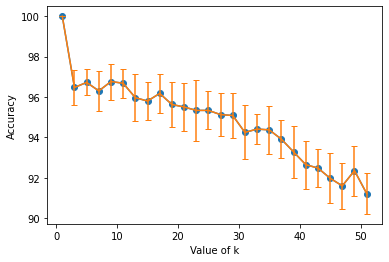

In [18]:
show_plot_of(predictionTrainSet,x)